# All Team models compared

In [1]:
# Import
from torch import nn
from torch.utils.data import DataLoader

from models.models import *
from datasets.datasets import *
from utils import *

In [2]:
# Meta
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


# Dataset

In [3]:
NL=[1,2,3,4,5]
N=[5]
file = './Data/team/processed/team_data.xlsx'
dataset = get_team_dataset(file, NL=NL)

Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure


# Dataloader

In [4]:
batch_size = 50
N_datasets = dataset.random_split(0.2)

### Varying N Dataloader

In [5]:
dataloaders_train = {}
dataloaders_test ={}
for Nd in N_datasets:
    #dataset_train = TeamDataset(Nd[1],N=Nd[0])
    #dataset_test = TeamDataset(Nd[2],N=Nd[0])

    # Set max_N to 0 to remove padding
    dataset_train = TeamDataset(Nd[1],max_N=0)
    dataset_test = TeamDataset(Nd[2],max_N=0)

    # Must generate batches of sequence data with the following format:
    # (batch_size, num_seasons(N), input_size(num stats))
    # (https://stackoverflow.com/questions/49466894/how-to-correctly-give-inputs-to-embedding-lstm-and-linear-layers-in-pytorch/49473068#49473068)
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

    dataloaders_train[Nd[0]] = dataloader_train
    dataloaders_test[Nd[0]] = dataloader_test

### Fixed N Dataloaders

In [6]:
N_datasets_train = []
N_datasets_test = []
N_dataloaders_train = []   
N_dataloaders_test = []
all_datasets_train = []
all_datasets_test = []

# Create dataset for each N
for (N, train_dataset, test_dataset) in N_datasets:

    # Get dataset with only one N 
    new_dataset = get_team_dataset(file, NL=[N])
    (N, train_dataset, test_dataset) = new_dataset.random_split(0.2)[0]
    
    # Create datasets
    N_datasets_train.append(TeamDataset(train_dataset, max_N=N))
    N_datasets_test.append(TeamDataset(test_dataset, max_N=N))
    

    # Add to "all datasets" dataset
    all_datasets_train += train_dataset
    all_datasets_test +=test_dataset

    print(f"Train size for {N} seasons: {len(N_datasets_train[-1])}")
    print(f"Test size for {N} seasons: {len(N_datasets_test[-1])}")


    # Create dataloaders
    N_dataloaders_train.append(DataLoader(N_datasets_train[-1], batch_size=batch_size, shuffle=True))
    N_dataloaders_test.append(DataLoader(N_datasets_test[-1], batch_size=batch_size, shuffle=True))


# Create dataset for "all datasets"
all_datasets_train = TeamDataset(all_datasets_train, max_N=max(NL))
all_datasets_test = TeamDataset(all_datasets_test, max_N=max(NL))
print(f"Train size for all seasons: {len(all_datasets_train)}")
print(f"Test size for all seasons: {len(all_datasets_test)}")
all_dataloader_train = DataLoader(all_datasets_train, batch_size=batch_size, shuffle=True)
all_dataloader_test = DataLoader(all_datasets_test, batch_size=batch_size, shuffle=True)

print(N_datasets_train[0].__getitem__(0))

Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure


Train size for 1 seasons: 721
Test size for 1 seasons: 183
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 2 seasons: 653
Test size for 2 seasons: 183
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 3 seasons: 591
Test size for 3 seasons: 177
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 4 seasons: 576
Test size for 4 seasons: 125
Targets
['W%', 'L%', 'S']
Normalizing features
[]
All features
['W%', 'L%', 'GF/G', 'GA/G', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SV%']
Loading player data
creating dataset structure
Train size for 5 seasons: 521
Test size for 5 seasons: 116
T

# Training and Validation


There are 

-Average (one per N) (1)
-Linear (one per N) (5)
-LSTM Fixed N (one per N) (5)
-LSTM Varying N (one per N) (1)

## Standalone LSTM Model

In [7]:
input_size = len(dataset_train.__getitem__(0)[0][0])
output_size = len(dataset_train.__getitem__(0)[1])
hidden_size = 10
num_layers = 1

criterion = RMSELoss()

lr = 0.001
opt = torch.optim.Adam

epochs = 50
loss_interval = 5

### Fixed N Models

Training model for 1 seasons
0 th epoch :  1.0071436643600464
Validation loss for epoch 0: 1.0225213766098022
Validation loss for epoch 5: 0.9936666935682297
10 th epoch :  0.8753671248753866
Validation loss for epoch 10: 0.9131564199924469
Validation loss for epoch 15: 0.8956236094236374
20 th epoch :  0.8543873389561971
Validation loss for epoch 20: 0.8845535218715668
Validation loss for epoch 25: 0.8696142137050629
30 th epoch :  0.8336963454882304
Validation loss for epoch 30: 0.8652368038892746
Validation loss for epoch 35: 0.8616832047700882
40 th epoch :  0.8324341932932536
Validation loss for epoch 40: 0.8641401678323746
Validation loss for epoch 45: 0.8493009209632874


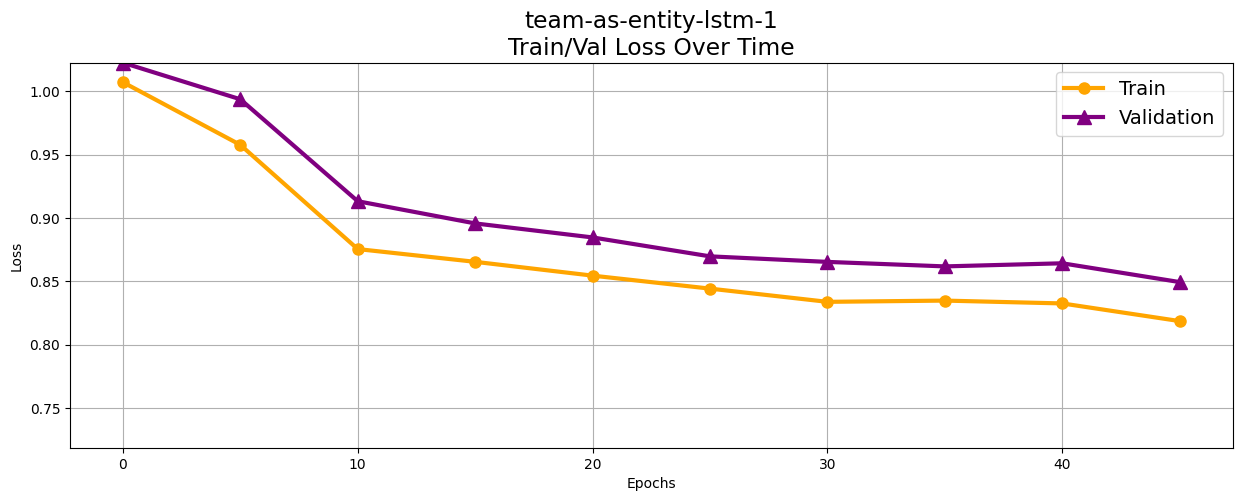

Training model for 2 seasons
0 th epoch :  0.9928776110921588
Validation loss for epoch 0: 1.013231486082077
Validation loss for epoch 5: 0.9201572984457016
10 th epoch :  0.8256658145359584
Validation loss for epoch 10: 0.9126129746437073
Validation loss for epoch 15: 0.9095556437969208
20 th epoch :  0.8314827169690814
Validation loss for epoch 20: 0.8904947638511658
Validation loss for epoch 25: 0.9112271070480347
30 th epoch :  0.8393569758960179
Validation loss for epoch 30: 0.9052007049322128
Validation loss for epoch 35: 0.9017198979854584
40 th epoch :  0.823149174451828
Validation loss for epoch 40: 0.9061604291200638
Validation loss for epoch 45: 0.912575826048851


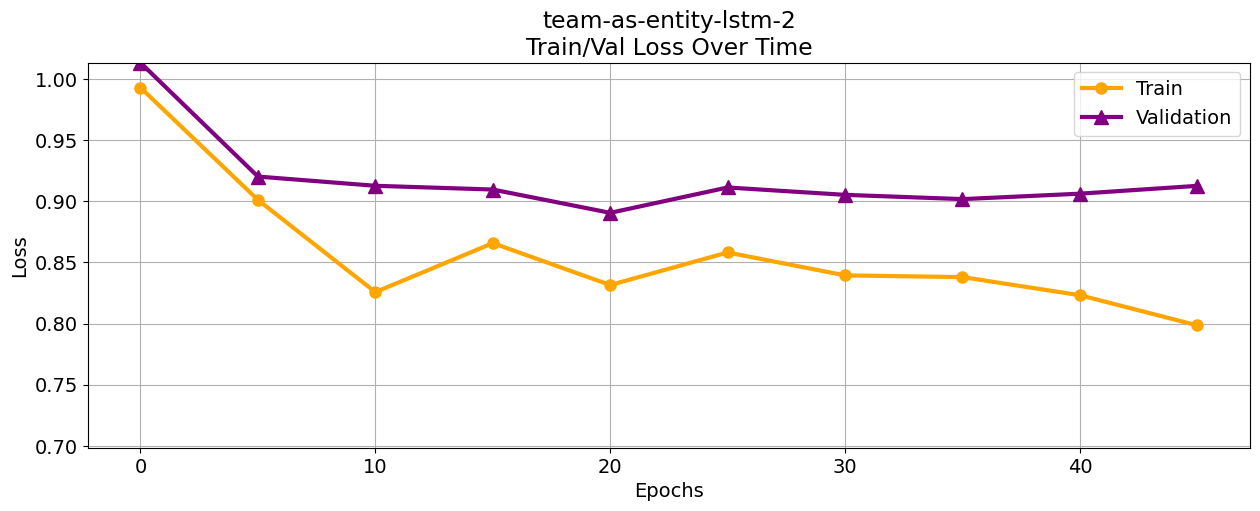

Training model for 3 seasons
0 th epoch :  1.0282064427932103
Validation loss for epoch 0: 1.0321140140295029
Validation loss for epoch 5: 0.9062937200069427
10 th epoch :  0.8795022269090017
Validation loss for epoch 10: 0.9018212109804153
Validation loss for epoch 15: 0.8934929072856903
20 th epoch :  0.8610179424285889
Validation loss for epoch 20: 0.8824327439069748
Validation loss for epoch 25: 0.9052409529685974
30 th epoch :  0.8403232395648956
Validation loss for epoch 30: 0.8918247073888779
Validation loss for epoch 35: 0.8849822580814362
40 th epoch :  0.8243092348178228
Validation loss for epoch 40: 0.8839179277420044
Validation loss for epoch 45: 0.8924136906862259


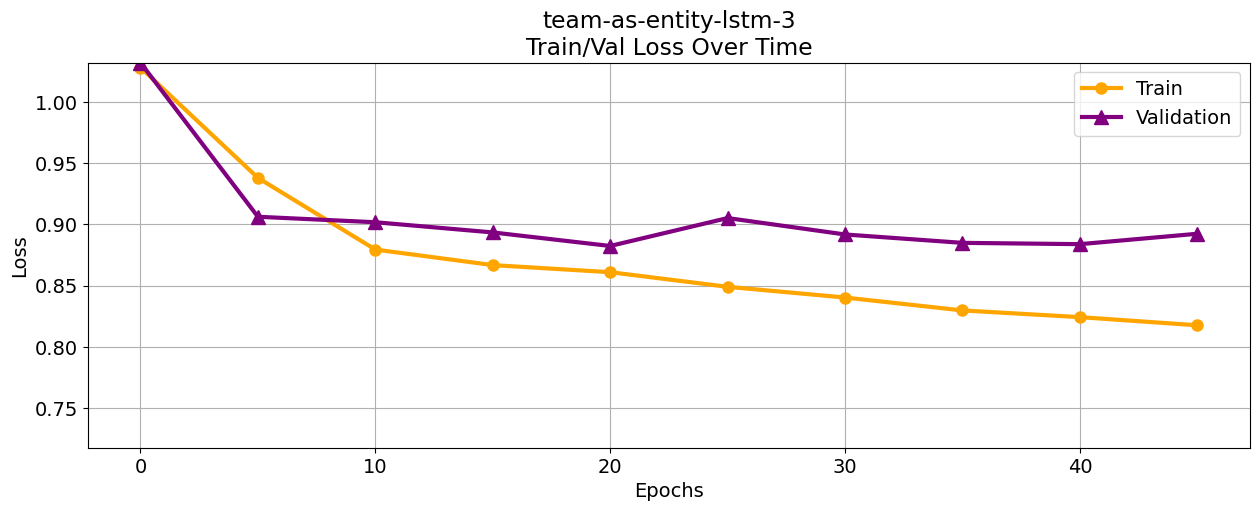

Training model for 4 seasons
0 th epoch :  1.022743249932925
Validation loss for epoch 0: 0.9579378763834635
Validation loss for epoch 5: 0.9399145841598511
10 th epoch :  0.8798058778047562
Validation loss for epoch 10: 0.8847374518712362
Validation loss for epoch 15: 0.8762674530347189
20 th epoch :  0.8606618791818619
Validation loss for epoch 20: 0.8509334325790405
Validation loss for epoch 25: 0.861414889494578
30 th epoch :  0.8412063817183176
Validation loss for epoch 30: 0.8449145158131918
Validation loss for epoch 35: 0.8408021132151285
40 th epoch :  0.8234811574220657
Validation loss for epoch 40: 0.8549690643946329
Validation loss for epoch 45: 0.8319328824679056


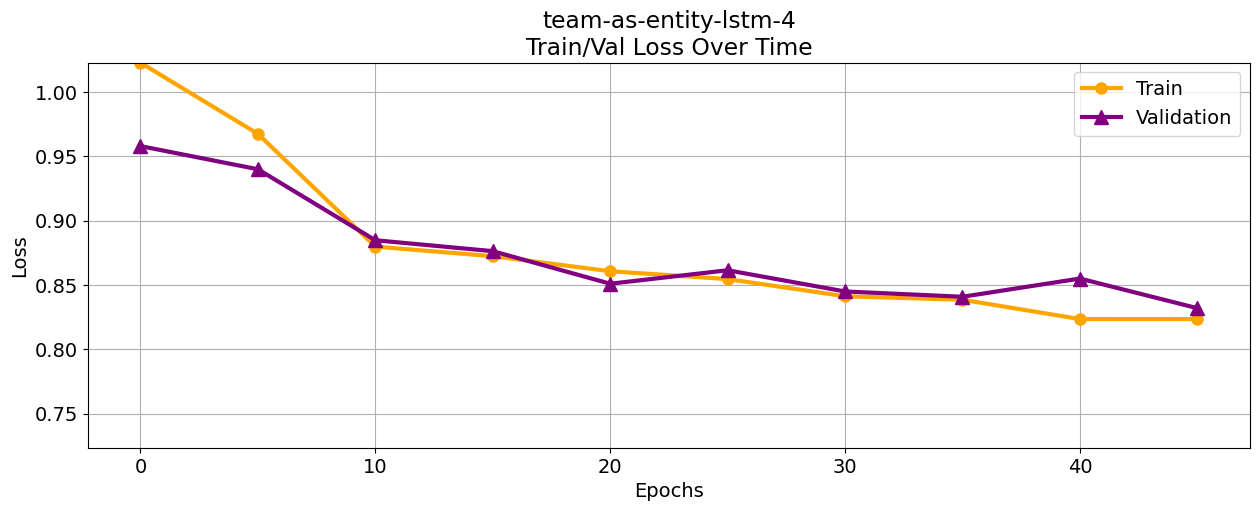

Training model for 5 seasons
0 th epoch :  1.0068966692144221
Validation loss for epoch 0: 1.179553786913554
Validation loss for epoch 5: 1.094131628672282
10 th epoch :  0.8801598061214794
Validation loss for epoch 10: 0.9407904346783956
Validation loss for epoch 15: 0.9444442987442017
20 th epoch :  0.8258506168018688
Validation loss for epoch 20: 0.921696404616038
Validation loss for epoch 25: 0.9603172341982523
30 th epoch :  0.795169635252519
Validation loss for epoch 30: 0.9110452731450399
Validation loss for epoch 35: 0.9168238043785095
40 th epoch :  0.7663705836642872
Validation loss for epoch 40: 0.9285127917925516
Validation loss for epoch 45: 0.9274598360061646


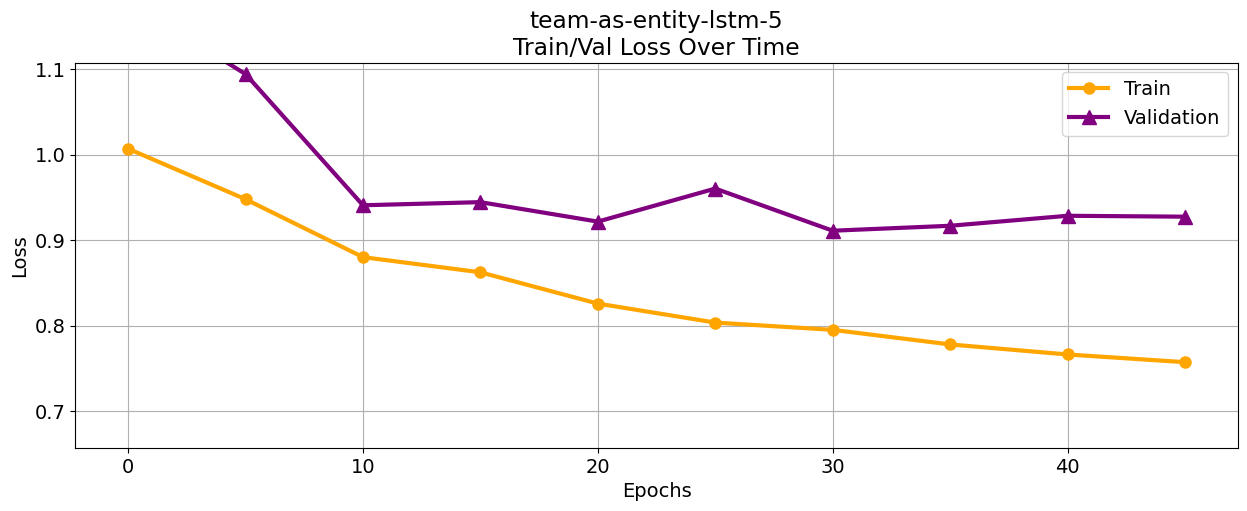

In [8]:
# Standalone Model Fixed N
model_N_losses = []
model_N = []
for i in range(len(NL)):
    print(f"Training model for {NL[i]} seasons")
    model_N.append(TeamStandalone(input_size=input_size, output_size=output_size, hidden_size=hidden_size, device=device).to(device))
    optimizer = opt(model_N[i].parameters(), lr=lr)
    
    (model_N[i], train_losses, val_losses) = train_and_validate(model_N[i], criterion, optimizer, N_dataloaders_train[i], N_dataloaders_test[i], epochs=epochs, loss_interval=loss_interval, device=device)
    model_N_losses.append((train_losses, val_losses))

    plot_train_v_loss(f"team-as-entity-lstm-{NL[i]}", train_losses, val_losses, loss_interval)
    
    


### Varying N model (with padding) - UNUSED

Training model for all seasons
0 th epoch :  0.9684092162116882
Validation loss for epoch 0: 0.957656916230917
Validation loss for epoch 5: 0.8803439326584339
10 th epoch :  0.8329721266223539
Validation loss for epoch 10: 0.8574720621109009
Validation loss for epoch 15: 0.8453579470515251
20 th epoch :  0.7832152064769499
Validation loss for epoch 20: 0.8316961042582989
Validation loss for epoch 25: 0.8183553256094456
30 th epoch :  0.7537846594087539
Validation loss for epoch 30: 0.8048897795379162
Validation loss for epoch 35: 0.7989083044230938
40 th epoch :  0.7357015946219044
Validation loss for epoch 40: 0.7961805462837219
Validation loss for epoch 45: 0.7929287105798721


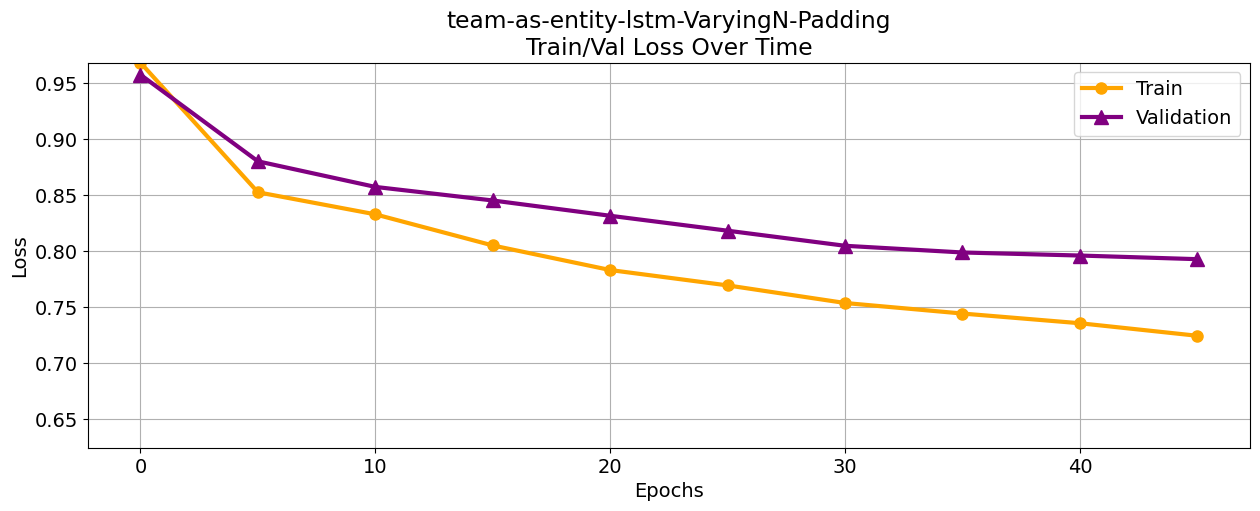

In [9]:
# Train on all data
print("Training model for all seasons")
input_size = len(all_datasets_train.__getitem__(0)[0][0])
model_all = TeamStandalone(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers, device=device).to(device)
optimizer = opt(model_all.parameters(), lr=lr)
(model_all, train_losses, val_losses) = train_and_validate(model_all, criterion, optimizer, all_dataloader_train, all_dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)

model_all_losses = (train_losses, val_losses)

plot_train_v_loss(f"team-as-entity-lstm-VaryingN-Padding", train_losses, val_losses, loss_interval)

### Varying N model (no padding)

0 th epoch :  0.9904704344272613
Validation loss for epoch 0: 0.966323177019755
Validation loss for epoch 5: 0.8728143260592506
10 th epoch :  0.8437403702735901
Validation loss for epoch 10: 0.8303063284783136
Validation loss for epoch 15: 0.8357560492697216
20 th epoch :  0.8109513366222382
Validation loss for epoch 20: 0.8401855003266108
Validation loss for epoch 25: 0.8163446571145739
30 th epoch :  0.7804726147651673
Validation loss for epoch 30: 0.823919293426332
Validation loss for epoch 35: 0.812620997428894
40 th epoch :  0.7429070675373077
Validation loss for epoch 40: 0.8023608990368389
Validation loss for epoch 45: 0.8360934626488459


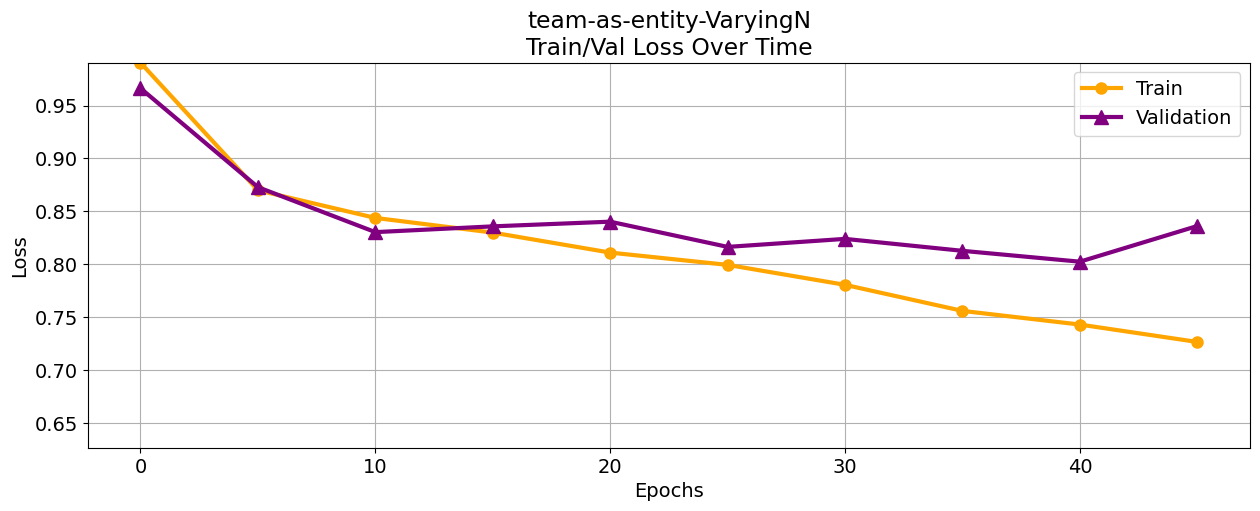

In [10]:
results = []
#epochs = 200
model = TeamStandalone(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers, device=device).to(device)
optimizer = opt(model.parameters(),lr=lr)

res = train_and_validate_varying_N(model, criterion, optimizer, dataloaders_train, dataloaders_test, epochs=epochs, loss_interval=loss_interval, device=device)

plot_train_v_loss(f"team-as-entity-VaryingN", res[1], res[2], loss_interval)

In [11]:
#save model_all to file
torch.save(model.state_dict(), 'models/checkpoints/player_standalone_all_N.pth')

## Linear Baseline Models

### Linear Fixed N

Training model for 1 seasons
0 th epoch :  1.299978788693746
Validation loss for epoch 0: 1.2881095111370087
Validation loss for epoch 5: 1.1058592796325684


10 th epoch :  1.0020838419596354
Validation loss for epoch 10: 0.9896621853113174
Validation loss for epoch 15: 0.9445754140615463
20 th epoch :  0.9012170712153117
Validation loss for epoch 20: 0.9237856864929199
Validation loss for epoch 25: 0.8995084464550018
30 th epoch :  0.8845033288002014
Validation loss for epoch 30: 0.895757868885994
Validation loss for epoch 35: 0.8922456204891205


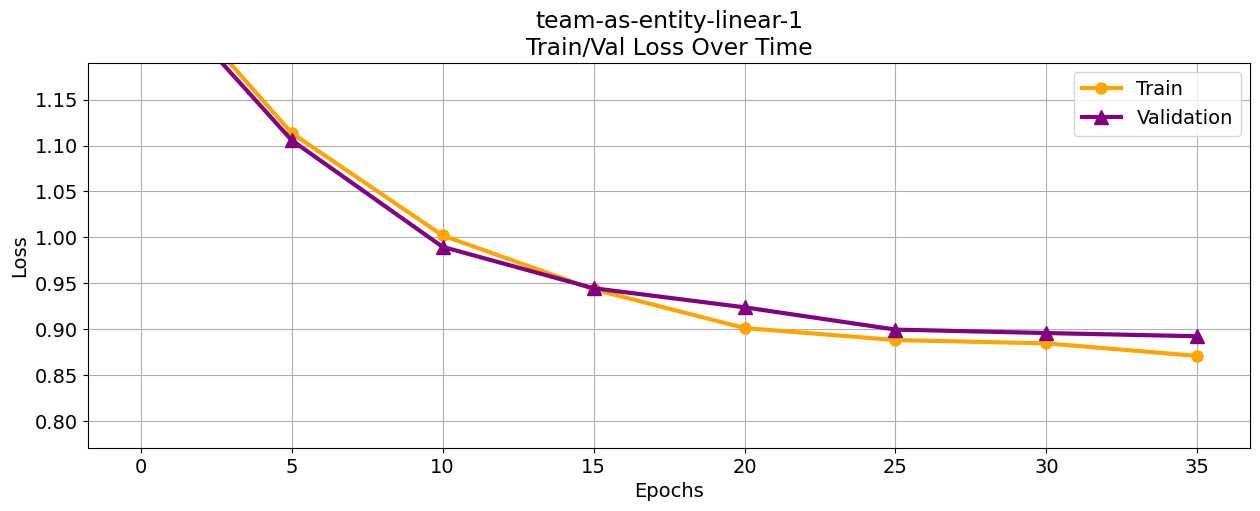

Training model for 2 seasons
0 th epoch :  1.037538720028741
Validation loss for epoch 0: 1.119883269071579
Validation loss for epoch 5: 0.9899949133396149
10 th epoch :  0.931600306715284
Validation loss for epoch 10: 0.9460075944662094
Validation loss for epoch 15: 0.9221088141202927
20 th epoch :  0.844660541840962
Validation loss for epoch 20: 0.9052772969007492
Validation loss for epoch 25: 0.9002629071474075
30 th epoch :  0.8673556830201831
Validation loss for epoch 30: 0.9024808257818222
Validation loss for epoch 35: 0.8998536169528961


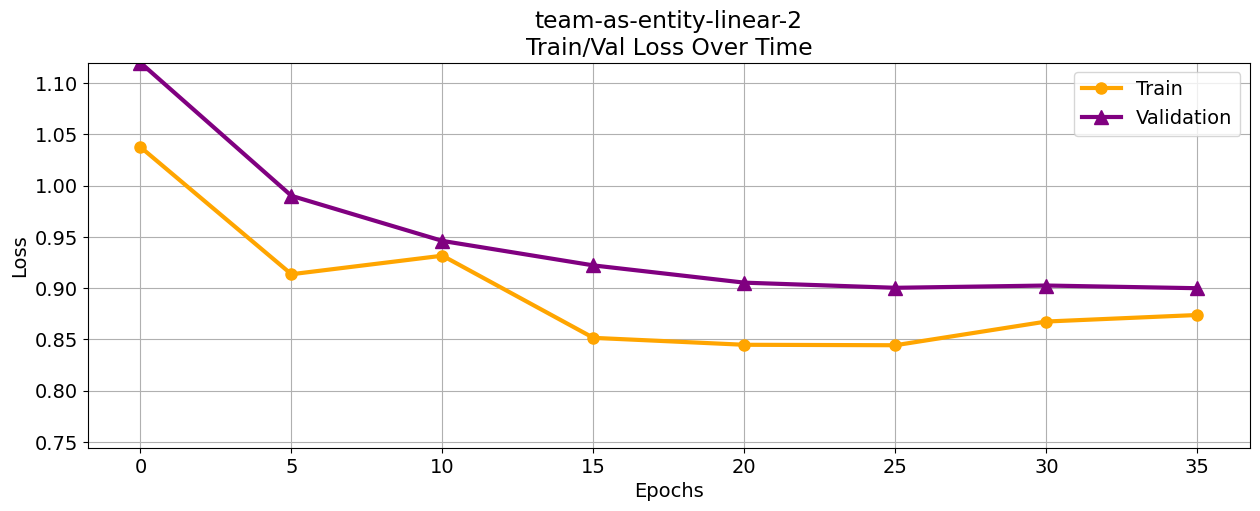

Training model for 3 seasons
0 th epoch :  1.130223423242569
Validation loss for epoch 0: 1.0970319658517838
Validation loss for epoch 5: 0.9543558657169342
10 th epoch :  0.9062307178974152
Validation loss for epoch 10: 0.9027551561594009
Validation loss for epoch 15: 0.9041158109903336
20 th epoch :  0.8724715063969294
Validation loss for epoch 20: 0.9059274345636368
Validation loss for epoch 25: 0.87285116314888
30 th epoch :  0.8560763150453568
Validation loss for epoch 30: 0.8785189092159271
Validation loss for epoch 35: 0.8817218095064163


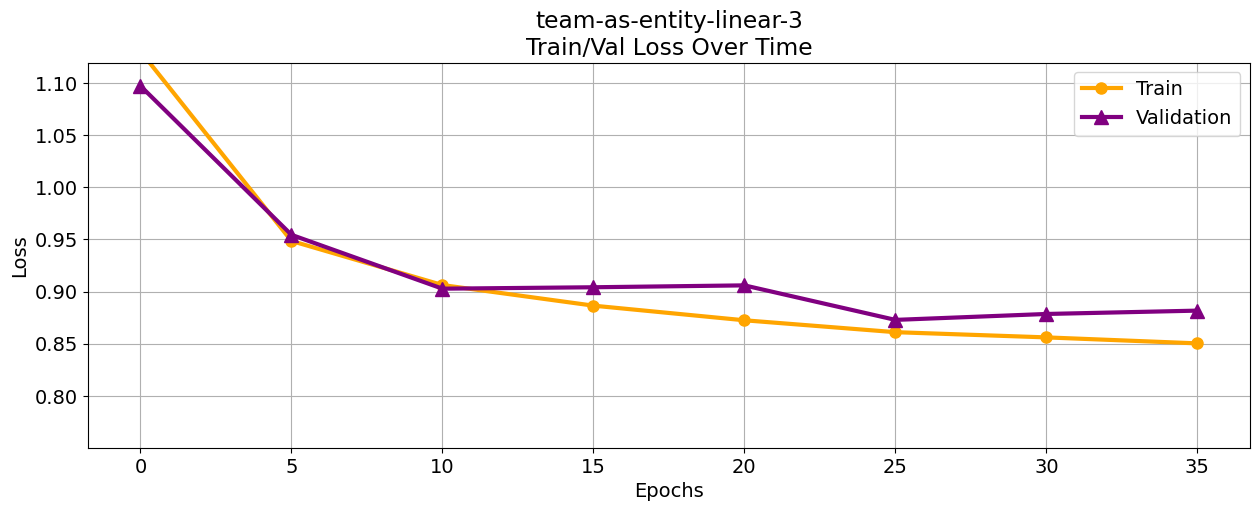

Training model for 4 seasons
0 th epoch :  1.0829430371522903
Validation loss for epoch 0: 1.0927759011586506
Validation loss for epoch 5: 0.9927376906077067
10 th epoch :  0.9001240134239197
Validation loss for epoch 10: 0.9200969139734904
Validation loss for epoch 15: 0.8633824388186137
20 th epoch :  0.8607246925433477
Validation loss for epoch 20: 0.8825706640879313
Validation loss for epoch 25: 0.8739053606987
30 th epoch :  0.8452882468700409
Validation loss for epoch 30: 0.8674594163894653
Validation loss for epoch 35: 0.8741847475369772


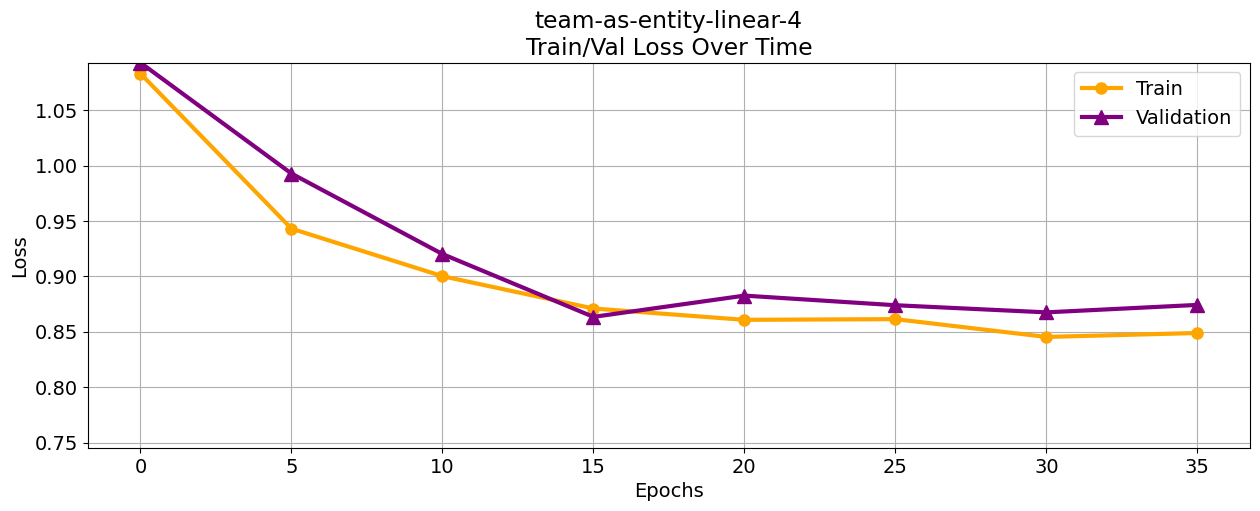

Training model for 5 seasons
0 th epoch :  1.2025814923373135
Validation loss for epoch 0: 1.2500274578730266
Validation loss for epoch 5: 1.005104660987854
10 th epoch :  0.9017744822935625
Validation loss for epoch 10: 0.9417522350947062
Validation loss for epoch 15: 0.9346835613250732
20 th epoch :  0.849138314073736
Validation loss for epoch 20: 0.9376469453175863
Validation loss for epoch 25: 0.937224268913269
30 th epoch :  0.841862212527882
Validation loss for epoch 30: 0.9059173663457235
Validation loss for epoch 35: 0.888767421245575


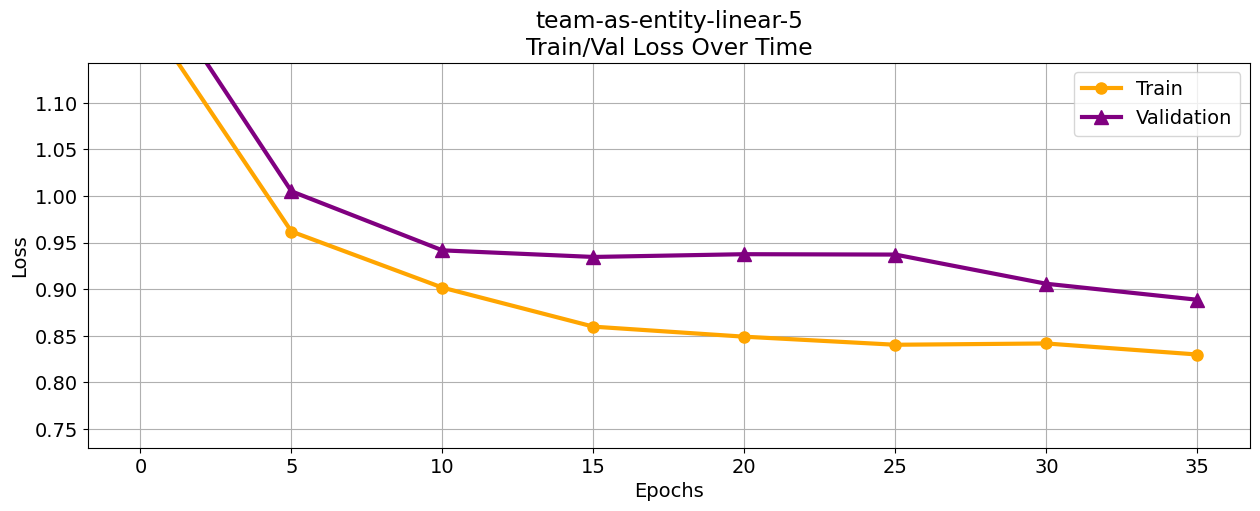

In [12]:
lr = 0.001
epochs = 40
loss_interval = 5

model_linear_N = []
model_linear_N_losses = []


for i in range(len(NL)):
    print(f"Training model for {NL[i]} seasons")
    input_size = len(N_datasets_train[i].__getitem__(0)[0][0])
    model_linear_N.append(TeamLinear(input_size=input_size, output_size=output_size, N=i+1, device=device).to(device))
    optimizer = opt(model_linear_N[i].parameters(), lr=lr)
    
    (model_linear_N[i], train_losses,val_losses) = train_and_validate(model_linear_N[i], criterion, optimizer, N_dataloaders_train[i], N_dataloaders_test[i], epochs=epochs, loss_interval=loss_interval, device=device)
    model_linear_N_losses.append((train_losses, val_losses))

    plot_train_v_loss(f"team-as-entity-linear-{NL[i]}", train_losses, val_losses, loss_interval)

### Linear Varying N (with padding)

Training model for all seasons


0 th epoch :  0.9900979466976658
Validation loss for epoch 0: 0.9511760324239731
Validation loss for epoch 5: 0.8783638440072536
10 th epoch :  0.8399147400932927
Validation loss for epoch 10: 0.8738127239048481
Validation loss for epoch 15: 0.8645410425961018
20 th epoch :  0.8344143282982611
Validation loss for epoch 20: 0.8625242151319981
Validation loss for epoch 25: 0.856251023709774
30 th epoch :  0.8270801200020698
Validation loss for epoch 30: 0.8586482144892216
Validation loss for epoch 35: 0.8554766699671745


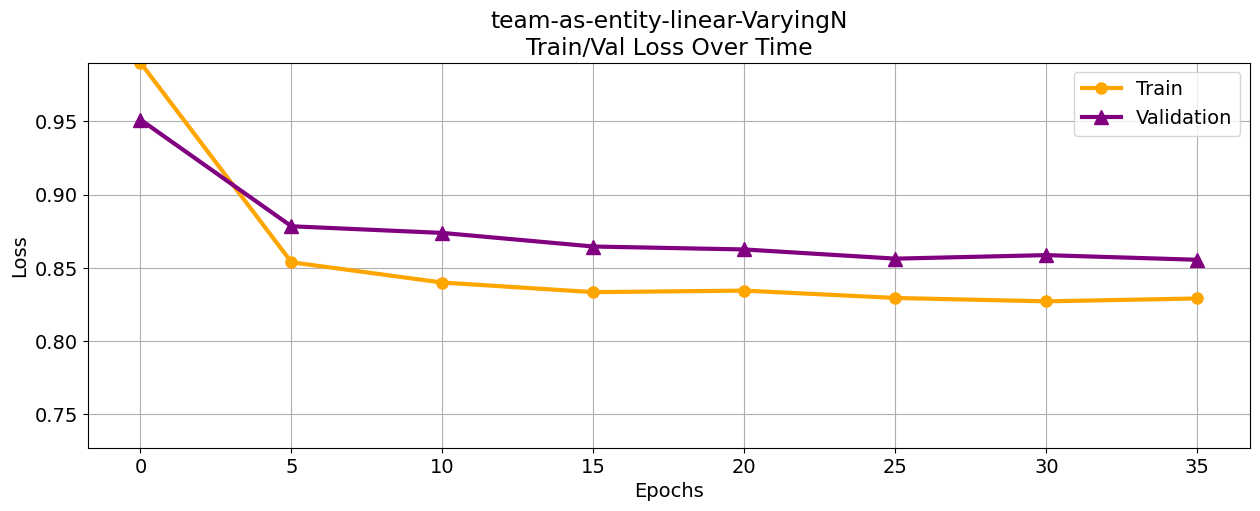

In [13]:
# Train on all data
print("Training model for all seasons")
input_size = len(all_datasets_train.__getitem__(0)[0][0])
model_linear_all = TeamLinear(input_size=input_size, output_size=output_size, N=5, device=device).to(device)
optimizer = opt(model_linear_all.parameters(), lr=lr)
(model_linear_all, train_losses,val_losses) = train_and_validate(model_linear_all, criterion, optimizer, all_dataloader_train, all_dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)

model_linear_all_losses = (train_losses, val_losses)

plot_train_v_loss(f"team-as-entity-linear-VaryingN", train_losses, val_losses, loss_interval)

# Collect train and val losses

## Average Baseline Model

In [14]:
avg_loss_N = []

print(output_size)

for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        avg_pred.append(torch.mean(x, dim=0)[[i for i in range(output_size)]]) # select only targets
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    avg_loss_N.append(criterion(avg_pred, avg_target))
    

3


## LSTM Model trained over all N values (with padding)

In [15]:
#evaluate model trained on all N for individual N
model_all_losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        pred = model_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        pred = model_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_all_losses_N.append((train_loss, test_loss))

## LSTM Model trained over all N values (without padding)

In [16]:
#evaluate model trained on all N for individual N
model_all__losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        pred = model(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        pred = model(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_all__losses_N.append((train_loss, test_loss))

## Linear Model trained over all N values (with padding)

In [17]:
 
model_linear_all_losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        #pad
        pads = [torch.zeros_like(x[0]) for _ in range(4-i)]
        #use pre-padding
        if i != 4:
            padded_x = torch.cat((torch.stack(pads), x), dim=0)
        else:
            padded_x = x
        
        pred = model_linear_all(padded_x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        #pad
        pads = [torch.zeros_like(x[0]) for _ in range(4-i)]
        #use pre-padding
        if i != 4:
            padded_x = torch.cat((torch.stack(pads), x), dim=0)
        else:
            padded_x = x
        pred = model_linear_all(padded_x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_linear_all_losses_N.append((train_loss, test_loss))

# Plot Results

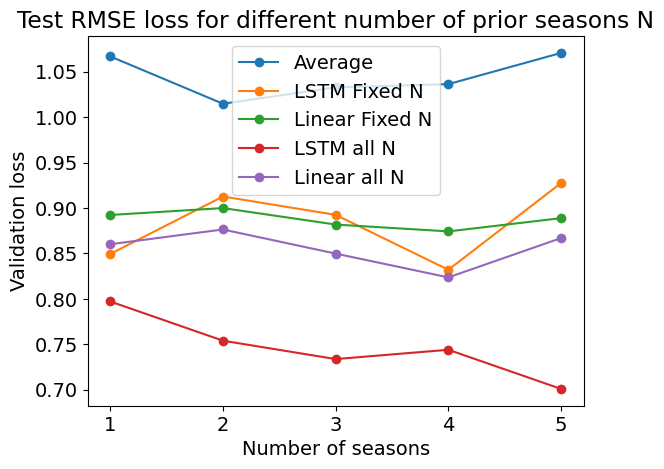

In [18]:
#plot seaons on x-axis and final validation loss on y-axis
plt.title('Test RMSE loss for different number of prior seasons N')
plt.plot(range(1,6), avg_loss_N, label='Average',marker='o')
plt.plot(range(1,6), [model_N_losses[i][1][-1] for i in range(5)], label='LSTM Fixed N',marker='o')
plt.plot(range(1,6), [model_linear_N_losses[i][1][-1] for i in range(5)], label='Linear Fixed N',marker='o')
plt.plot(range(1,6), [model_all__losses_N[i][1] for i in range(5)], label='LSTM all N',marker='o')
plt.plot(range(1,6), [model_linear_all_losses_N[i][1] for i in range(5)], label='Linear all N',marker='o')
plt.xlabel('Number of seasons')
plt.ylabel('Validation loss')
plt.xticks(range(1,6))
plt.legend()

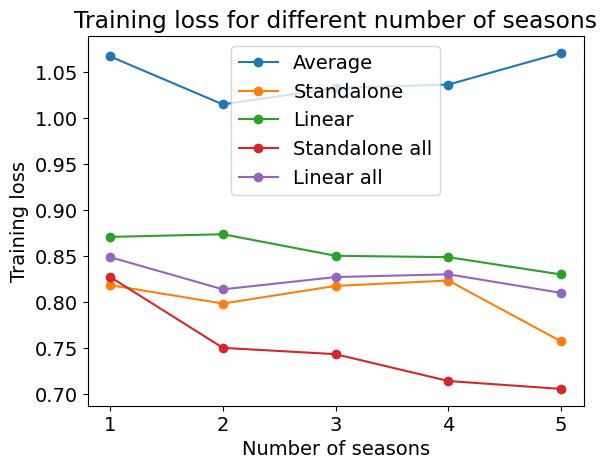

In [19]:
plt.title('Training loss for different number of seasons')
plt.plot(range(1,6), avg_loss_N, label='Average',marker='o')
plt.plot(range(1,6), [model_N_losses[i][0][-1] for i in range(5)], label='Standalone',marker='o')
plt.plot(range(1,6), [model_linear_N_losses[i][0][-1] for i in range(5)], label='Linear',marker='o')
plt.plot(range(1,6), [model_all__losses_N[i][0] for i in range(5)], label='Standalone all',marker='o')
plt.plot(range(1,6), [model_linear_all_losses_N[i][0] for i in range(5)], label='Linear all',marker='o')
plt.xlabel('Number of seasons')
plt.ylabel('Training loss')
plt.xticks(range(1,6))
plt.legend()
